In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Data Collection


In [2]:
df = pd.read_csv('grand-prix-race-winners.csv')

In [3]:
df.head()

,Circuit,Class,Constructor,Country,Rider,Season
0,Circuit Of The Americas,Moto3™,KTM,ES,Jaume Masia,2022
1,Circuit Of The Americas,Moto2™,Kalex,IT,Tony Arbolino,2022
2,Circuit Of The Americas,MotoGP™,Ducati,IT,Enea Bastianini,2022
3,Termas de Río Hondo,Moto3™,GASGAS,ES,Sergio Garcia,2022
4,Termas de Río Hondo,MotoGP™,Aprilia,ES,Aleix Espargaro,2022


# Data Organization

Create a file for the data visualizations we will use it in future steps and called visualizations.

In [5]:
path = os.getcwd()
directory = "data"
data_dir = os.path.join(path, directory)

In [6]:
directory = "visualizations"
vis_dir = os.path.join(path, directory)
os.mkdir(vis_dir)

# Data Definition

Review some data types, column names, etc...

In [7]:
df.columns

Index(['Circuit', 'Class', 'Constructor', 'Country', 'Rider', 'Season'], dtype='object')

In [8]:
df.dtypes

Circuit        object
Class          object
Constructor    object
Country        object
Rider          object
Season          int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Circuit      3083 non-null   object
 1   Class        3083 non-null   object
 2   Constructor  3055 non-null   object
 3   Country      3018 non-null   object
 4   Rider        3083 non-null   object
 5   Season       3083 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 144.6+ KB


In [15]:
df['Rider'].value_counts()

Giacomo Agostini       119
Valentino Rossi        105
Angel Nieto             87
Marc Marquez            82
Mike Hailwood           72
                      ... 
Can öncü                 1
Virginio Ferrari         1
Steve Jenkner            1
Tony Jefferies           1
Manliefe Barrington      1
Name: Rider, Length: 388, dtype: int64

In [13]:
df.agg([min,max]).T

<ipython-input-13-d06bff35aac8>:1: FutureWarning: ['Constructor', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg([min,max]).T


,min,max
Circuit,Albi,Termas de Río Hondo
Class,125cc,MotoGP™
Rider,Aalt Toersen,Yuki Takahashi
Season,1949,2022


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,3083.0,1988.363283,20.185907,1949.0,1972.0,1988.0,2007.0,2022.0


# Data Cleaning

In [17]:
NA=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = NA['percent'] > 0
NA[pos]

,percent
Country,0.021083
Constructor,0.009082


In [27]:
df['Constructor'].fillna(0, inplace=True)
df['Rider'].fillna(0, inplace=True)
df['Season'].fillna((df['Season'].mean()), inplace=True)

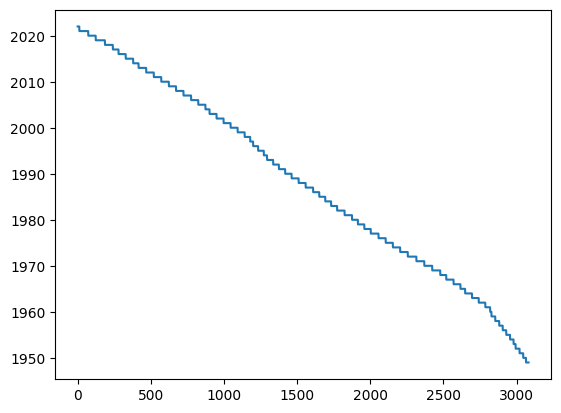

In [26]:
plt.plot(df['Season'])

In [30]:
df['Season'].fillna(float(round(df['Season'].mean())), inplace=True)

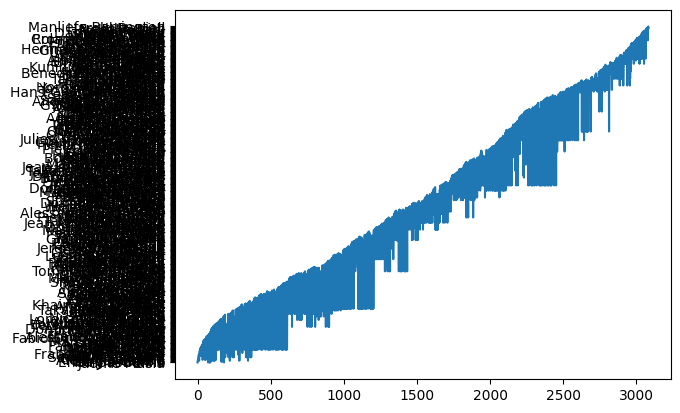

In [28]:
plt.plot(df['Rider'])

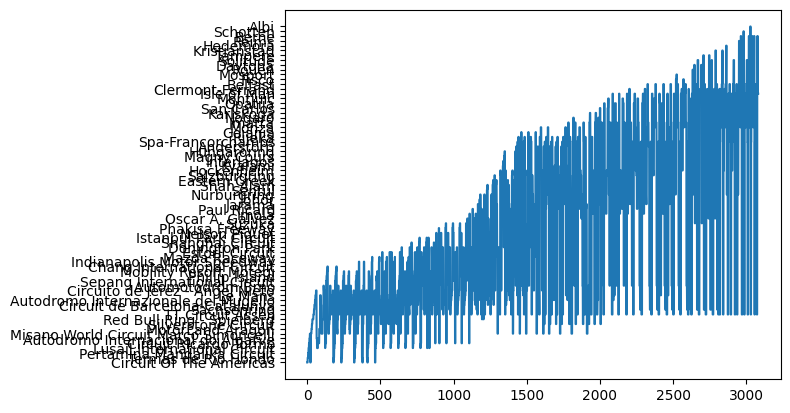

In [32]:
plt.plot(df['Circuit'])

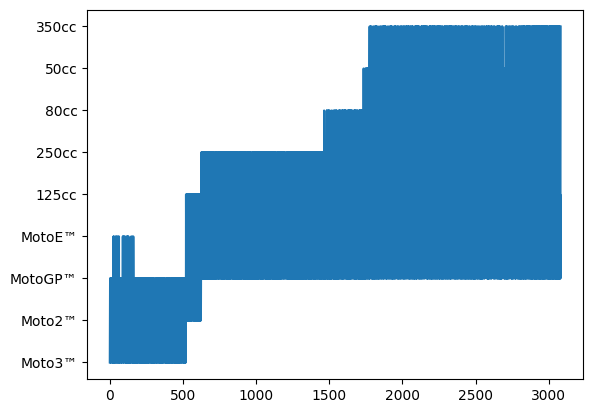

In [33]:
plt.plot(df['Class'])

In [38]:
duplicateRows_df = df[df.duplicated()]
duplicateRows_df

,Circuit,Class,Constructor,Country,Rider,Season
24,Misano World Circuit Marco Simoncelli,Moto3™,Honda,IT,Dennis Foggia,2021
64,Autódromo Internacional do Algarve,Moto3™,KTM,ES,Pedro Acosta,2021
71,Lusail International Circuit,Moto2™,Kalex,GB,Sam Lowes,2021
86,MotorLand Aragón,Moto2™,Kalex,GB,Sam Lowes,2020
87,MotorLand Aragón,Moto3™,Honda,ES,Jaume Masia,2020
103,Misano World Circuit Marco Simoncelli,MotoE™,Energica,IT,Matteo Ferrari,2020
119,Circuito de Jerez - Angel Nieto,MotoGP™,Yamaha,FR,Fabio Quartararo,2020
128,Circuit Ricardo Tormo,MotoE™,Energica,BR,Eric Granado,2019
147,Misano World Circuit Marco Simoncelli,MotoE™,Energica,IT,Matteo Ferrari,2019


We just reviewed the NA and the missing values. Also checked for duplicate rows. There still have 9 duplicate rows but I'm not sure the reason why they still shows.